<a href="https://colab.research.google.com/github/malick741/MACHINE-LEARNING/blob/main/Prediction_Prix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,LabelEncoder
from sklearn.model_selection import train_test_split,learning_curve
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression


In [9]:
df0=pd.read_csv('/content/train.csv')
df=df0.copy()
dfT=pd.read_csv('/content/test.csv')
df1=dfT.copy()

In [10]:
def procedd(df):
    df.drop(df[['PoolQC','Fence','MiscFeature','Alley']],axis=1,inplace=True)
    df.drop_duplicates(inplace=True)
    df['Electrical']=df['Electrical'].ffill()
    df[['FireplaceQu','MasVnrType','BsmtQual','MasVnrArea']]=df[['FireplaceQu','MasVnrType','BsmtQual','MasVnrArea']].fillna('0')
    df[['BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinSF1','BsmtFinType2'  ]]=df[['BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinSF1','BsmtFinType2'  ]].fillna('0')
    df[['GarageType', 'GarageYrBlt','GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond'  ]]=df[['GarageType', 'GarageYrBlt','GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond'  ]].fillna('0')
    df['GarageYrBlt']=df['GarageYrBlt'].astype(int)
    df['LotFrontage']=df['LotFrontage'].fillna(df['LotFrontage'].mean())
    
    return df
df=procedd(df0)





def procedd(df1):
    df1.drop(df1[['PoolQC','Fence','MiscFeature','Alley']],axis=1,inplace=True)
    df1.drop_duplicates(inplace=True)
    df1['Electrical']=df1['Electrical'].ffill()
    df1[['FireplaceQu','MasVnrType','BsmtQual','MasVnrArea']]=df1[['FireplaceQu','MasVnrType','BsmtQual','MasVnrArea']].fillna('0')
    df1[['BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinSF1','BsmtFinType2'  ]]=df1[['BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinSF1','BsmtFinType2'  ]].fillna('0')
    df1[['GarageType', 'GarageYrBlt','GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond'  ]]=df1[['GarageType', 'GarageYrBlt','GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond'  ]].fillna('0')
    df1['GarageYrBlt']=df1['GarageYrBlt'].astype(int)
    df1['LotFrontage']=df1['LotFrontage'].fillna(df['LotFrontage'].mean())
    #df1.dropna(inplace=True)
    return df1
df1=procedd(df1)


encc=LabelEncoder()
x_train=df[['LotFrontage','LotArea', 'Neighborhood', 'YearBuilt', 'BsmtFinSF1', 'TotalBsmtSF','1stFlrSF', 'GrLivArea', 'GarageArea']]
x_test=df[['LotFrontage','LotArea', 'Neighborhood', 'YearBuilt', 'BsmtFinSF1', 'TotalBsmtSF','1stFlrSF', 'GrLivArea', 'GarageArea']]


x_train['Neighborhood']=encc.fit_transform(x_train['Neighborhood'])
x_test['Neighborhood']=encc.fit_transform(x_test['Neighborhood'])



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [11]:
y=df['SalePrice']

In [12]:
del df['SalePrice']

In [13]:
#encodage des donnees
model=make_pipeline( RobustScaler(),GradientBoostingRegressor()) 
param_grid={'gradientboostingregressor__n_estimators':[20], 
            'gradientboostingregressor__max_depth':[10], 
            'gradientboostingregressor__min_samples_leaf':[5], 
            'gradientboostingregressor__max_features':['auto'] ,
            'robustscaler__with_centering':[False]} 
grid=GridSearchCV(model,param_grid,cv=10, scoring='neg_mean_squared_error')
#sorted(grid.estimator.get_params().keys())
grid.fit(x_train,y)
grid.score(x_train,y)

-255046250.41262066

In [14]:
grid.best_estimator_

Pipeline(memory=None,
         steps=[('robustscaler',
                 RobustScaler(copy=True, quantile_range=(25.0, 75.0),
                              with_centering=False, with_scaling=True)),
                ('gradientboostingregressor',
                 GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                           criterion='friedman_mse', init=None,
                                           learning_rate=0.1, loss='ls',
                                           max_depth=10, max_features='auto',
                                           max_leaf_nodes=None,
                                           min_impurity_decrease=0.0,
                                           min_impurity_split=None,
                                           min_samples_leaf=5,
                                           min_samples_split=2,
                                           min_weight_fraction_leaf=0.0,
                                           n_estimator

In [20]:
train_sizes, train_scores, test_scores=learning_curve(grid,x_train,y,cv=10, scoring='neg_mean_squared_error',n_jobs=-1, train_sizes=np.linspace(0.01, 1.0, 50))

In [25]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

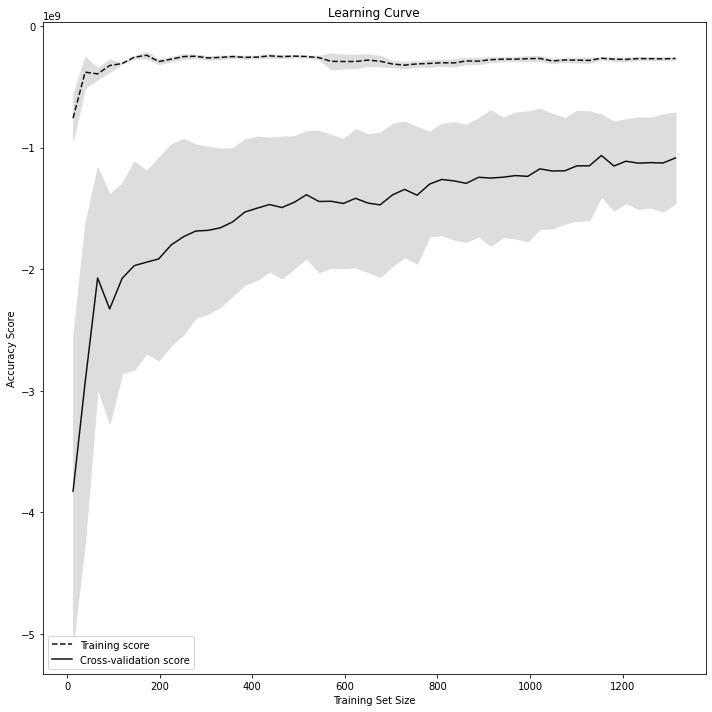

In [27]:
plt.subplots(1, figsize=(10,10))
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [8]:
y

NameError: ignored